In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/program_5_dataset.csv")

In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check for any remaining missing values
df.isnull().sum()


Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extracting predictor and target variables
X = df[['CREA']]
y = df['PROT']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple linear regression model
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train, y_train)

# Predictions
y_pred_train = simple_lr_model.predict(X_train)
y_pred_test = simple_lr_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')


Mean Squared Error (Train): 28.84020207572904
Mean Squared Error (Test): 24.98052149031294
R-squared (Train): 0.001438312305032663
R-squared (Test): -0.00025751174954624645


# The R-squared values for both train and test sets are very low, indicating that the simple linear regression model is not a good fit for the data. The model explains only about 0.14% of the variance in the train set and almost none in the test set. This means that the predictor variable CREA is not linearly related to the target variable PROT, or that there are other factors that affect the target variable that are not captured by the model.

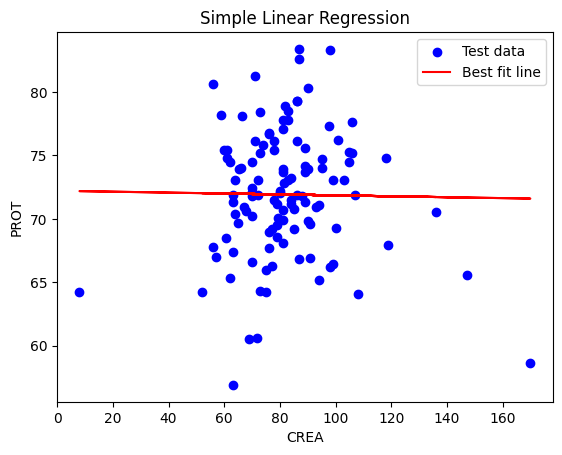

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, y_pred_test, color='red', label='Best fit line')
plt.xlabel('CREA')
plt.ylabel('PROT')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()







In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Extracting predictors and target variable
X = df[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT']]
y = df['PROT']

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Finalize the list of predictors based on VIF factor
# Assuming a VIF threshold of 5
selected_predictors = vif_data[vif_data['VIF'] < 5]['feature'].tolist()

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(df[selected_predictors], y, test_size=0.2, random_state=42)

# Build multiple linear regression using the selected predictors
X_train = sm.add_constant(X_train)  # adding a constant for the intercept
multi_lr_model = sm.OLS(y_train, X_train).fit()
print(multi_lr_model.summary())

# Predict
X_test = sm.add_constant(X_test)  # adding a constant for the intercept
y_pred_train = multi_lr_model.predict(X_train)
y_pred_test = multi_lr_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')


  feature        VIF
0     ALB  31.162740
1     ALP  10.024253
2     ALT   3.184002
3     AST   2.938453
4     BIL   1.678633
5     CHE  22.397373
6    CHOL  27.238712
7    CREA   3.656226
8     GGT   2.542260
                            OLS Regression Results                            
Dep. Variable:                   PROT   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3736
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.867
Time:                        05:14:41   Log-Likelihood:                -1437.7
No. Observations:                 464   AIC:                             2887.
Df Residuals:                     458   BIC:                             2912.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         


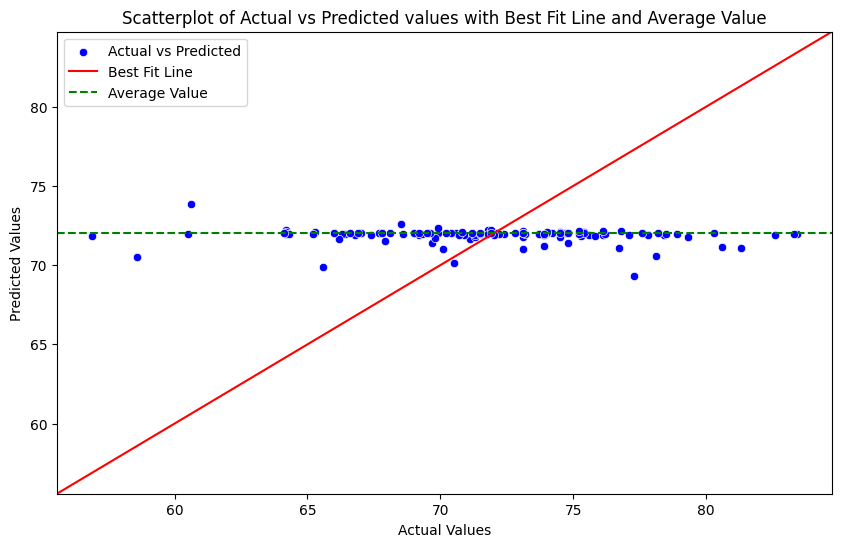

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test and y_pred_test contain the actual and predicted values from the multiple linear regression
# Also assume that the average value of y_test is calculated as average_actual

# Plotting the scatterplot with the average value and best fit line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, color='b', label='Actual vs Predicted')
plt.axline((y_test.min(), y_test.min()), (y_test.max(), y_test.max()), color='r', label='Best Fit Line')
plt.axhline(y=average_actual, color='g', linestyle='--', label='Average Value')
plt.title('Scatterplot of Actual vs Predicted values with Best Fit Line and Average Value')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'ALB' is the attribute with the highest VIF
selected_attribute = 'ALB'

# Extract the selected predictor and target variable
X_poly = df[[selected_attribute]]
y_poly = df['PROT']

# Iterate through 3 different degrees for polynomial regression
for degree in [2, 3, 4]:
    # Transform the predictor variable to include polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_transformed = poly.fit_transform(X_poly)

    # Split the transformed data into training and testing sets
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_transformed, y_poly, test_size=0.2, random_state=42)

    # Build and fit the polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train_poly)

    # Predict
    y_pred_train_poly = poly_model.predict(X_train_poly)
    y_pred_test_poly = poly_model.predict(X_test_poly)

    # Evaluate the model
    mse_train_poly = mean_squared_error(y_train_poly, y_pred_train_poly)
    mse_test_poly = mean_squared_error(y_test_poly, y_pred_test_poly)
    r2_train_poly = r2_score(y_train_poly, y_pred_train_poly)
    r2_test_poly = r2_score(y_test_poly, y_pred_test_poly)

    # Print results for each degree
    print(f'Polynomial Degree: {degree}')
    print(f'Mean Squared Error (Train): {mse_train_poly}')
    print(f'Mean Squared Error (Test): {mse_test_poly}')
    print(f'R-squared (Train): {r2_train_poly}')
    print(f'R-squared (Test): {r2_test_poly}')
    print('\n')


Polynomial Degree: 2
Mean Squared Error (Train): 16.136334670375096
Mean Squared Error (Test): 20.083890933197896
R-squared (Train): 0.44129637027679336
R-squared (Test): 0.19581091295952224


Polynomial Degree: 3
Mean Squared Error (Train): 16.1360834091464
Mean Squared Error (Test): 20.084883661793377
R-squared (Train): 0.44130506993277774
R-squared (Test): 0.19577116261903627


Polynomial Degree: 4
Mean Squared Error (Train): 16.097795438245022
Mean Squared Error (Test): 20.082153884716128
R-squared (Train): 0.44263075068707014
R-squared (Test): 0.19588046698355777




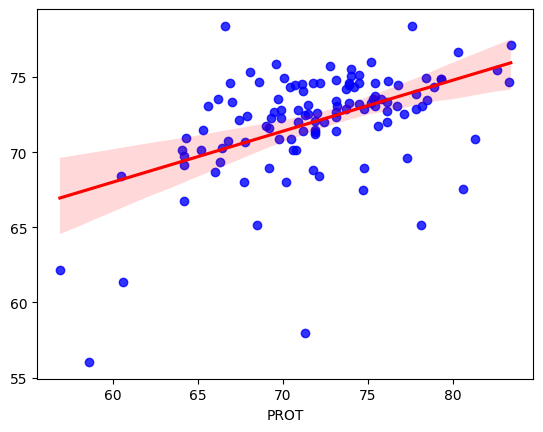

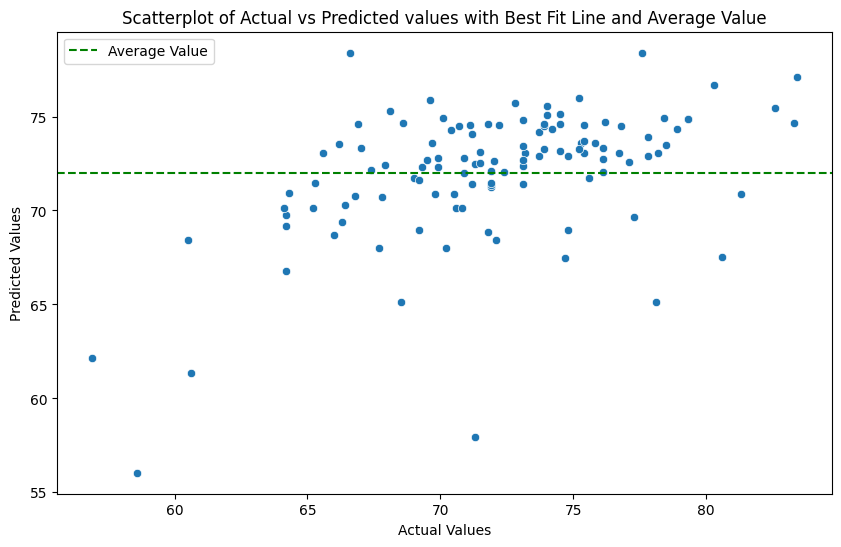

In [ ]:
import numpy as np

# Calculate the average value of the actual data
average_actual = np.mean(y_test_poly)

# Calculate the best fit line
sns.regplot(x=y_test_poly, y=y_pred_test_poly, scatter=True, color='b', line_kws={'color': 'red'})

# Plotting the scatterplot with the average value line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=scatter_data)
plt.axhline(y = average_actual, color='g', linestyle='--', label='Average Value')
plt.title('Scatterplot of Actual vs Predicted values with Best Fit Line and Average Value')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Assuming 'ALB' is the attribute with the highest VIF
selected_attribute = 'ALB'

# Extract the selected predictor and target variable
X_ridge = df[[selected_attribute]]
y_ridge = df['PROT']

# Initialize alpha values
alpha_values = np.linspace(0.1, 150, 13)

# Build Ridge regression models using different alpha values
ridge_models = {}
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_ridge, y_ridge, cv=5, scoring='neg_mean_squared_error')
    mean_mse = np.mean(-scores)
    ridge_model.fit(X_ridge, y_ridge)
    ridge_models[alpha] = {'model': ridge_model, 'mse': mean_mse}

# Evaluate models and extract performance metrics
for alpha, model_data in ridge_models.items():
    print(f"Alpha: {alpha}, Mean Squared Error (CV): {model_data['mse']}")
    print(f"Coefficient for alpha {alpha}: {model_data['model'].coef_}")
    print(f"Intercept for alpha {alpha}: {model_data['model'].intercept_}\n")


Alpha: 0.1, Mean Squared Error (CV): 19.976514148084885
Coefficient for alpha 0.1: [0.52241198]
Intercept for alpha 0.1: 50.156846323530594

Alpha: 12.591666666666667, Mean Squared Error (CV): 19.977500513091464
Coefficient for alpha 12.591666666666667: [0.52207136]
Intercept for alpha 12.591666666666667: 50.171045603521065

Alpha: 25.083333333333336, Mean Squared Error (CV): 19.978496646515577
Coefficient for alpha 25.083333333333336: [0.52173118]
Intercept for alpha 25.083333333333336: 50.18522637922854

Alpha: 37.575, Mean Squared Error (CV): 19.97950248904042
Coefficient for alpha 37.575: [0.52139145]
Intercept for alpha 37.575: 50.19938868680122

Alpha: 50.06666666666667, Mean Squared Error (CV): 19.9805179817009
Coefficient for alpha 50.06666666666667: [0.52105216]
Intercept for alpha 50.06666666666667: 50.21353256229322

Alpha: 62.55833333333334, Mean Squared Error (CV): 19.981543065881272
Coefficient for alpha 62.55833333333334: [0.5207133]
Intercept for alpha 62.55833333333334

In [ ]:
from sklearn.linear_model import Lasso

# Build LASSO regression models using different alpha values
lasso_models = {}
alpha_values_lasso = np.linspace(0.1, 100, 10)
for alpha in alpha_values_lasso:
    lasso_model = Lasso(alpha=alpha)
    scores_lasso = cross_val_score(lasso_model, X_ridge, y_ridge, cv=5, scoring='neg_mean_squared_error')
    mean_mse_lasso = np.mean(-scores_lasso)
    lasso_model.fit(X_ridge, y_ridge)
    lasso_models[alpha] = {'model': lasso_model, 'mse': mean_mse_lasso}

# Evaluate LASSO models and extract performance metrics
for alpha, model_data in lasso_models.items():
    print(f"Alpha: {alpha}, Mean Squared Error (CV): {model_data['mse']}")
    print(f"Coefficient for alpha {alpha}: {model_data['model'].coef_}")
    print(f"Intercept for alpha {alpha}: {model_data['model'].intercept_}\n")


Alpha: 0.1, Mean Squared Error (CV): 19.99191338352166
Coefficient for alpha 0.1: [0.51938534]
Intercept for alpha 0.1: 50.28301599699728

Alpha: 11.200000000000001, Mean Squared Error (CV): 25.829035921312595
Coefficient for alpha 11.200000000000001: [0.1831254]
Intercept for alpha 11.200000000000001: 64.30047542206653

Alpha: 22.300000000000004, Mean Squared Error (CV): 28.548526809601668
Coefficient for alpha 22.300000000000004: [0.]
Intercept for alpha 22.300000000000004: 71.9343103448276

Alpha: 33.400000000000006, Mean Squared Error (CV): 28.548526809601668
Coefficient for alpha 33.400000000000006: [0.]
Intercept for alpha 33.400000000000006: 71.9343103448276

Alpha: 44.50000000000001, Mean Squared Error (CV): 28.548526809601668
Coefficient for alpha 44.50000000000001: [0.]
Intercept for alpha 44.50000000000001: 71.9343103448276

Alpha: 55.60000000000001, Mean Squared Error (CV): 28.548526809601668
Coefficient for alpha 55.60000000000001: [0.]
Intercept for alpha 55.6000000000000

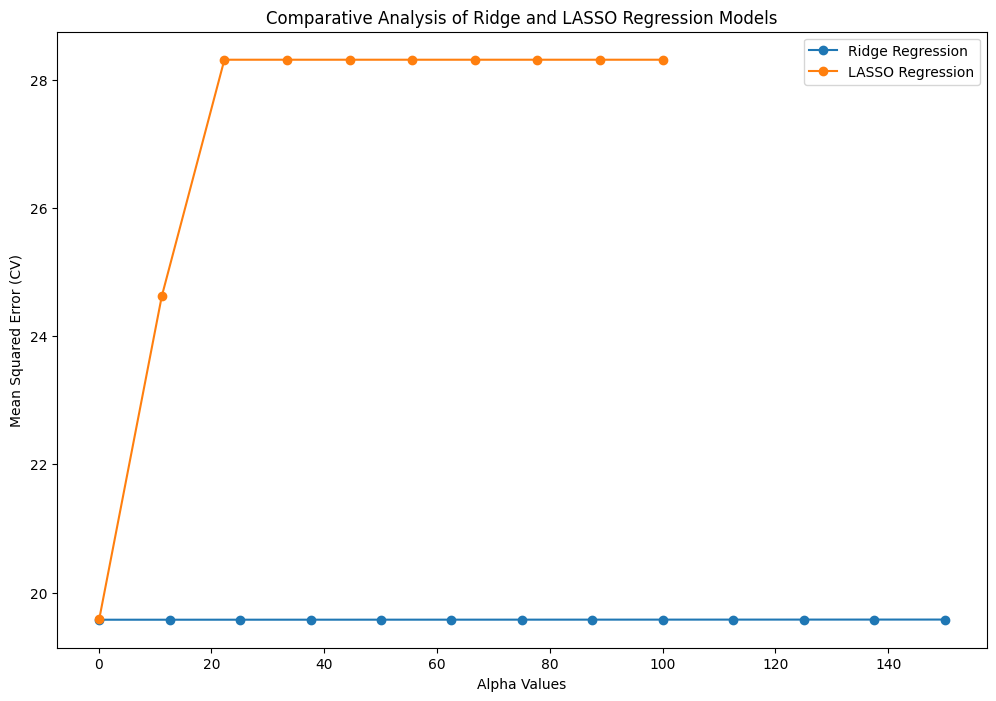

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# N-fold cross-validation for Ridge regression
ridge_mse = []
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    mse_scores = -1 * cross_val_score(ridge_model, X_ridge, y_ridge, cv=10, scoring='neg_mean_squared_error')
    ridge_mse.append(np.mean(mse_scores))

# N-fold cross-validation for LASSO regression
lasso_mse = []
for alpha in alpha_values_lasso:
    lasso_model = Lasso(alpha=alpha)
    mse_scores_lasso = -1 * cross_val_score(lasso_model, X_ridge, y_ridge, cv=10, scoring='neg_mean_squared_error')
    lasso_mse.append(np.mean(mse_scores_lasso))

# Plotting the comparative analysis graph
plt.figure(figsize=(12, 8))
plt.plot(alpha_values, ridge_mse, label='Ridge Regression', marker='o')
plt.plot(alpha_values_lasso, lasso_mse, label='LASSO Regression', marker='o')
plt.title('Comparative Analysis of Ridge and LASSO Regression Models')
plt.xlabel('Alpha Values')
plt.ylabel('Mean Squared Error (CV)')
plt.legend()
plt.show()
